In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


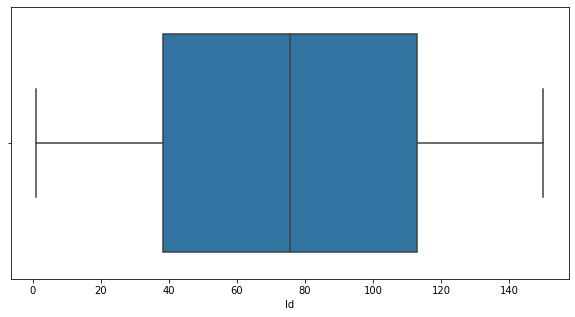

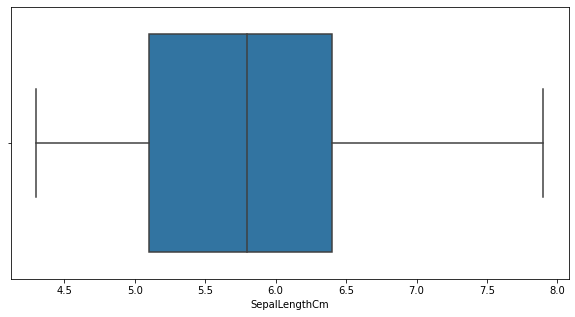

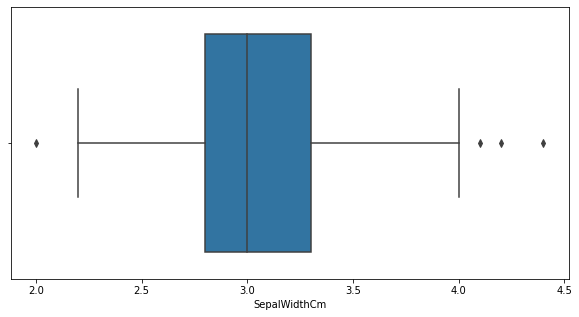

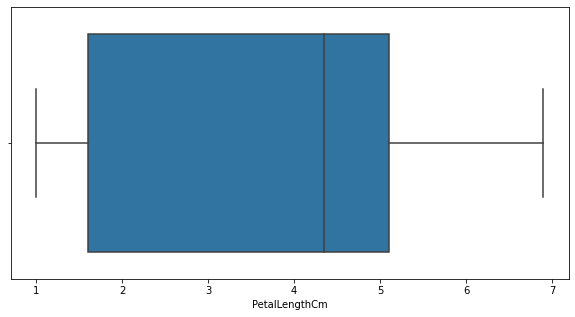

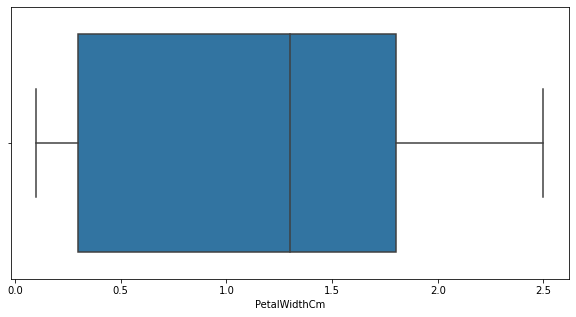

In [9]:
#for finding outliers use boxplot
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [10]:
for column in df.columns:
    q1=df['SepalWidthCm'].quantile(0.25)
    q3=df['SepalWidthCm'].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2)
    upper_range=q3+(1.5*q2)
    df['SepalWidthCm']=np.where(df['SepalWidthCm']<lower_range,lower_range,df['SepalWidthCm'])
    df['SepalWidthCm']=np.where(df['SepalWidthCm']>upper_range,upper_range,df['SepalWidthCm'])

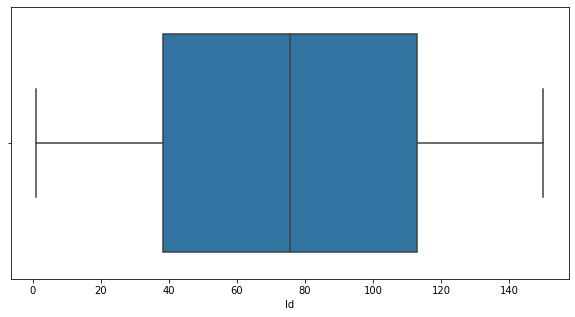

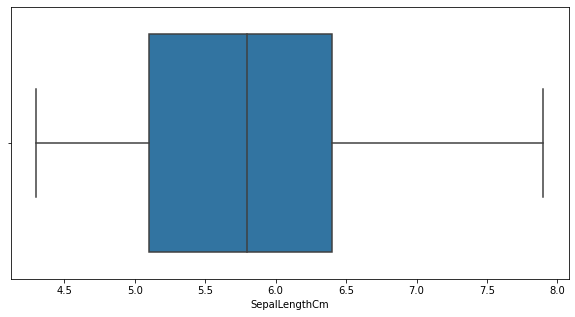

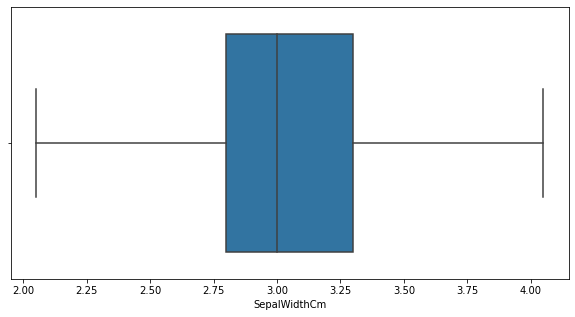

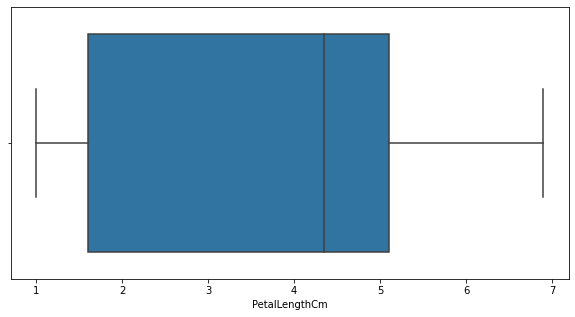

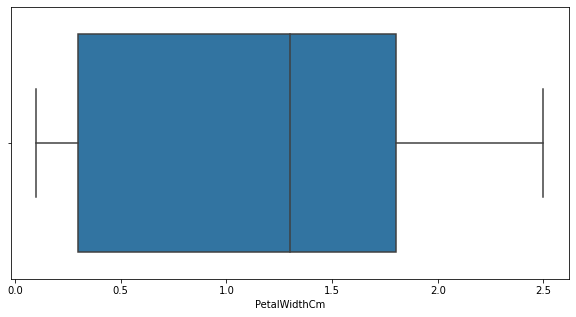

In [11]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [12]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397267,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.397267,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.882747,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.355582,0.962757,1.000000


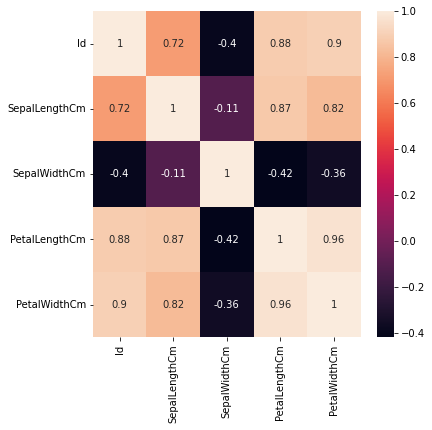

In [13]:
#correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df['Species']=df['Species'].replace({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2})

In [15]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [16]:
y=df['Species'].copy()
X=df.drop(['Species','Id'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
X.shape

(150, 4)

In [18]:
y.shape

(150,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [20]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [21]:
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int64

In [22]:
X_train.shape

(120, 4)

In [23]:
y_train.shape

(120,)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

1.0

In [26]:
y_pred_log= log_model.predict(X_test)
y_pred_log

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [27]:
print("Accuracy:", accuracy_score(y_test,y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_model.score(X_test, y_test)*100

96.66666666666667

In [29]:
y_pred_knn=knn_model.predict(X_test)
y_pred_knn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [30]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [31]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)*100

100.0

In [32]:
y_pred_svc=svc_model.predict(X_test)
y_pred_svc

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [33]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
naive_model.score(X_test, y_test)*100

96.66666666666667

In [35]:
y_pred_naive=naive_model.predict(X_test)
y_pred_naive

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
print(confusion_matrix(y_test, y_pred_naive))
print(classification_report(y_test, y_pred_naive))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators = 10, criterion ='entropy')
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)*100 

96.66666666666667

In [38]:
y_pred_rf= rf_model.predict(X_test)
y_pred_rf

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [39]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

